> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# including the package requires for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plot for missing data
import missingno as ms

#plotting inside the notebook with popup plot
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# #loading data
df=pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# About The columns
<b>
01 - PatientId :- Identification of a patient<br/>
02 - AppointmentID :- Identification of each appointment<br/>
03 - Gender :- Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.<br/>
04 - DataMarcacaoConsulta :- The day of the actuall appointment, when they have to visit the doctor.<br/>
05 - DataAgendamento :- The day someone called or registered the appointment, this is before appointment of course.<br/>
06 - Age :- How old is the patient.<br/>
07 - Neighbourhood :- Where the appointment takes place.<br/>
08 - Scholarship :- True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia<br/>
09 - Hipertension :- True or False<br/>
10 - Diabetes :- True or False<br/>
11 - Alcoholism :- True or False<br/>
12 - Handcap :- True or False<br/>
13 - SMS_received :- 1 or more messages sent to the patient.<br/>
14 - No-show :- True or False.</b>

In [3]:
#information about the data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Making the data good for analysis!)

<b>The PatientId and AppointmentID are not Important features to analysis.so simpiliy drop those features</b>

In [5]:
drop_col=["AppointmentID","PatientId"]
df.drop(drop_col,axis=1,inplace=True)

In [6]:
#check for drop
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<b>From plot that is clear that there is no missing data</b>

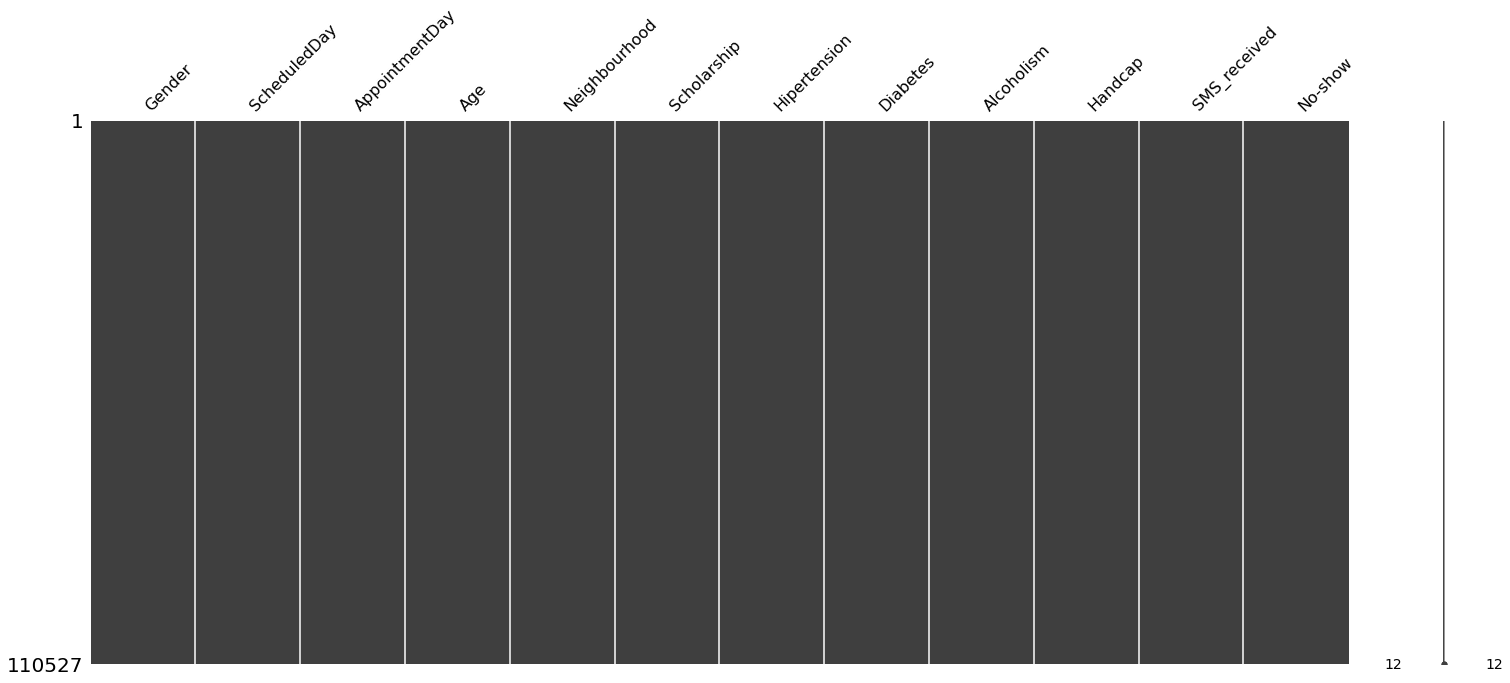

In [7]:
#to show the missing values in plot form
ms.matrix(df);

<b>finding the duplicate and removing</b>

In [8]:
#Number of duplicates
sum(df.duplicated())

635

In [10]:
#for checking the removal of duplicates
print(len(df))
#Removing the duplicates
df.drop_duplicates(inplace=True)
#conformation of removal
print(len(df))

110527
109892


In [9]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

### checking and changing the datatype

<b>ScheduledDay and AppointmentDay are in object datatype.we need to change them into datetime data type<br/>
    ScheduledDay and AppointmentDay has some string characters in it.so 
    <br/>
    step1 :- removing characters in it<br/>
    step2 :- change the data type
</b>

In [11]:
#columns need to change the data type
change_dtypes=['ScheduledDay','AppointmentDay']
for col in change_dtypes:
    #removing the String characters from date_time and converting date type into date time
    df[col]=pd.to_datetime(df[col].apply(lambda x :x.replace("T"," ").replace("Z","")))
df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

<b>changing the column names</b>

In [12]:
#changing all columns name into lower case for conviene
df.rename(columns=lambda x:x.lower(),inplace=True)

#replacing - with _ in No_show
df.rename(columns={"no-show":"no_show"},inplace=True)

In [13]:
#checking for the changes
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [14]:
#to know about neighbourhood for each row is different like id's
df.neighbourhood.nunique()

81

In [15]:
#printing unique values
print("Unique Values in `Gender` => {}".format(df.gender.unique()))
print("Unique Values in `Scholarship` => {}".format(df.scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(df.hipertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.handcap.unique()))
print("Unique Values in `SMSReceived` => {}".format(df.sms_received.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMSReceived` => [0 1]


In [16]:
#printing the unique age's
np.sort(df.age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

<b> In age column there are negative values.<br/>
    In the below code we will check few details about the patients with Age 0 and -1.
    </b>

In [17]:
print("Patients with `Age` less than -1 -> {}".format(df[df.age == -1].shape[0]))
print("Patients with `Age` equal to 0 -> {}".format(df[df.age == 0].shape[0]))

Patients with `Age` less than -1 -> 1
Patients with `Age` equal to 0 -> 3530


<b>Deleteing the row whose value's are less then 0</b>

In [18]:
df=df[df.age>=0]

<b>As we have 3530 patients with Age equal to 0 we are assuming that these are the small babies with few months of Age. Usually as babies doesn't have Hypertension or Diabetes or Alcoholism we will check these features for the above records.</b>

In [19]:
#finding number of babies having hipertension and diabetes and Alcoholism habbit
len(df[(df.age <= 0) & ((df.hipertension.astype(int) == 1) | (df.diabetes.astype(int) == 1) | (df.alcoholism.astype(int) == 1))])

0

The result conformed that babies doen't have hipertension and diabetes and Alcoholism habbit

<b> Now compare the Scheduledday and Appointmentday to know about Waiting time is positive which means greater than 0

In [20]:
#Scheduledday unique date
np.sort(df.scheduledday.dt.strftime('%Y-%m-%d').unique())

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

We can see from the above details that the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and that's around 7 months of data.

In [21]:
#unique values of Appointmentday
np.sort(df.appointmentday.dt.strftime('%Y-%m-%d').unique())

array(['2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-24', '2016-05-25', '2016-05-30',
       '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
       '2016-06-06', '2016-06-07', '2016-06-08'], dtype=object)

The Appointment Day's are over 1 month.The Appoinment just One Month in contrast to the ScheduledDay that around 7 Months.

<b>AppointmentDay should be on or after the ScheduledDay.<br/>

In [22]:
sum((df['scheduledday'] - df['appointmentday']).dt.days < 0)

71409

<b>ScheduledDay is after the AppointmentDay we will consider it as an error and correct the ScheduledDay to the AppointmentDay.</b>

In [23]:
df['appointmentday'] = np.where((df['appointmentday'] - df['scheduledday']).dt.days < 0, df['scheduledday'], df['appointmentday'])

waiting_days = df['appointmentday'] - df['scheduledday']
waiting_days = waiting_days.dt.days
print("Number of miss matchs are {}".format(sum(waiting_days<0)))

Number of miss matchs are 0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.
## Main Question For this kind of problems is :What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
<b>The need to investigate of this data is select the best futures from those who attend successful</b>

### Research Question 1 (Does Gender related to No-Show!)

<b>no_show column has two value "No" and "Yes" <br/>
No :- they had attended<br/>
Yes :- They are not attended</b>

In [24]:
#know about show and no_show
df.no_show.value_counts()

No     87793
Yes    22098
Name: no_show, dtype: int64

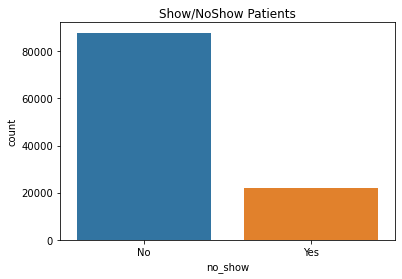

In [25]:
#plotting no_show
ax = sns.countplot(x=df.no_show, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

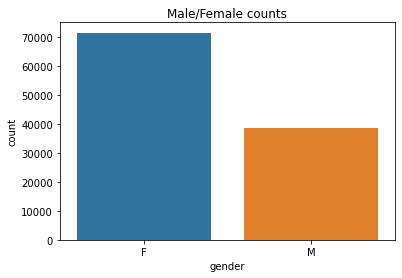

In [26]:
#ploatting Gender
ax = sns.countplot(x=df.gender, data=df)
ax.set_title("Male/Female counts")
plt.show()

In [27]:
Gender_count=df.groupby("gender").no_show.value_counts()


In [28]:
#proporsion of Female based on visited
Female_prop=Gender_count.F/df.query("gender=='F'").count().gender
Female_prop

no_show
No     0.797594
Yes    0.202406
Name: no_show, dtype: float64

In [29]:
#proporsion of Female based on visited
male_prop=Gender_count.M/df.query("gender=='M'").count().gender
male_prop

no_show
No     0.801352
Yes    0.198648
Name: no_show, dtype: float64

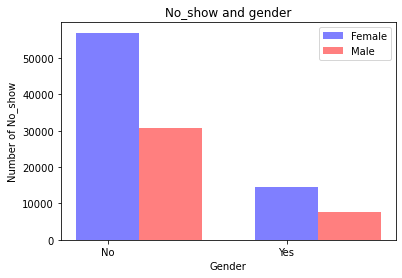

In [30]:
#to know relation of gender with no_show without proportions
width=0.35
location=[1,2]
Gender_count
plt.bar([1,2],Gender_count.F,width=width,color='b',label="Female",alpha=0.5)
plt.bar([1+width,2+width],Gender_count.M,width=width,color='r',label="Male",alpha=0.5)
plt.legend()
plt.xticks(location,["No","Yes"])
plt.xlabel("Gender")
plt.ylabel("Number of No_show")
plt.title("No_show and gender")
plt.show()

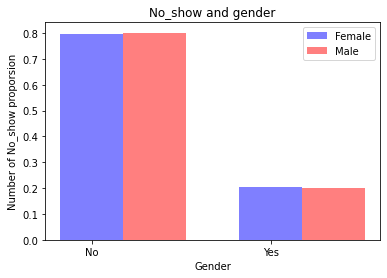

In [31]:
#to know relation of gender with no_show with proportions
width=0.35
location=[1,2]
Gender_count
plt.bar([1,2],Female_prop,width=width,color='b',label="Female",alpha=0.5)
plt.bar([1+width,2+width],male_prop,width=width,color='r',label="Male",alpha=0.5)
plt.legend()
plt.xticks(location,["No","Yes"])
plt.xlabel("Gender")
plt.ylabel("Number of No_show proporsion")
plt.title("No_show and gender")
plt.show()

<b> The above plot show Gender doesn't play a major role on whether they are visited</b>

### Research Question 2  (Less waiting time will help us to make decision!)

<b>Weighting time is no days difference between the "AppointmentDay" and "ScheduledDay"</b>

In [32]:
df['waiting_time_days'] = df['appointmentday'] - df['scheduledday']
#taking only days that how many days to wait
df['waiting_time_days'] = df['waiting_time_days'].dt.days

In [33]:
df.waiting_time_days.value_counts()

0      43644
1       6698
3       5269
6       4862
5       4015
       ...  
122        1
124        1
138        1
145        1
131        1
Name: waiting_time_days, Length: 128, dtype: int64

<b>for Visualization purpose the waiting time is divided into two Blocks<br/>
    1.First 55 value as Part 1<br/>
    2.Remaining as second part</b>

<h3>part I</h3>

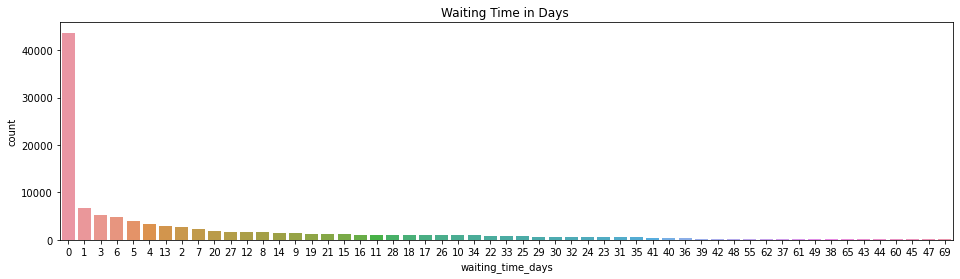

In [34]:
#
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.waiting_time_days, order=df.waiting_time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days ")
plt.show()

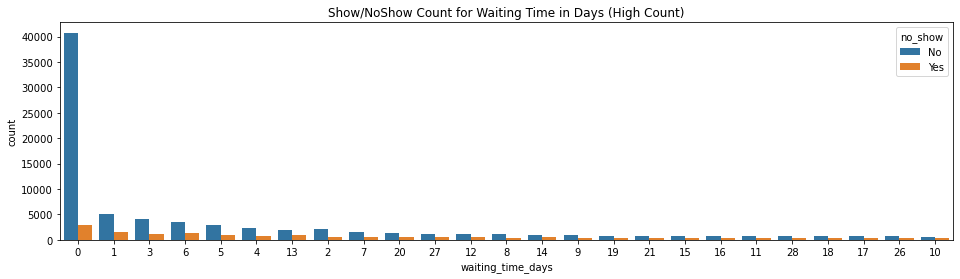

In [35]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.waiting_time_days, hue=df.no_show, order=df.waiting_time_days.value_counts().iloc[:25].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

The above plot shows that who has less waiting time are attended without missing.

<h3>Part II(Remaining waiting_times_dates )</h3>

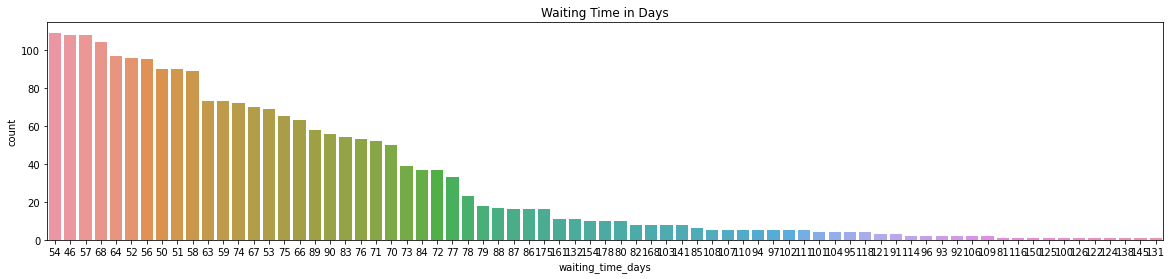

In [36]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x=df.waiting_time_days, order=df.waiting_time_days.value_counts().iloc[55:].index)
ax.set_title("Waiting Time in Days")
plt.show()

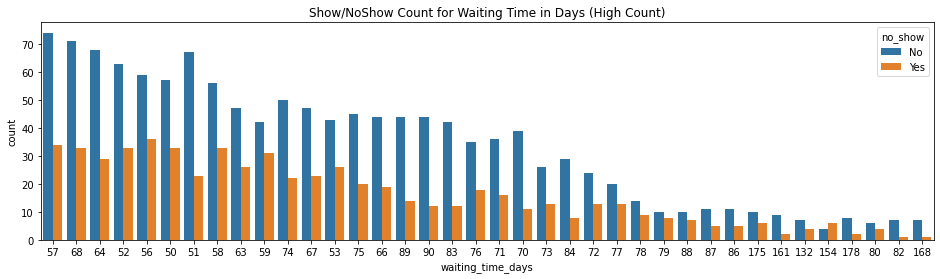

In [37]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.waiting_time_days, hue=df.no_show, order=df.waiting_time_days.value_counts().iloc[57:95].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

This is also like part 1 but some fluctuation

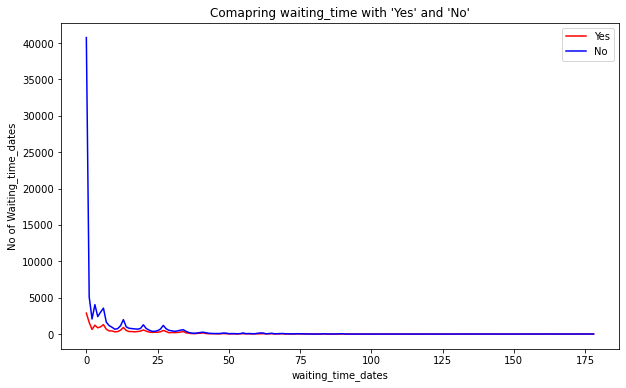

In [38]:

fig, ax = plt.subplots(figsize = (10,6));
sns.lineplot(x=df.query("no_show=='Yes'").waiting_time_days.value_counts().index,y=df.query("no_show=='Yes'").waiting_time_days.value_counts(),data=df,color='r',label="Yes");
sns.lineplot(x=df.query("no_show=='No'").waiting_time_days.value_counts().index,y=df.query("no_show=='No'").waiting_time_days.value_counts(),data=df,color="b",label="No");
ax.legend();
ax.set_xlabel("waiting_time_dates");
ax.set_ylabel("No of Waiting_time_dates");
ax.set_title("Comapring waiting_time with 'Yes' and 'No'")
plt.show()


Most of Visiter's are have less waiting time and not visiter's has plan line

### Research Question 3  (Alcoholism will able to classifies better!)

In [39]:
df.alcoholism.value_counts()

0    106547
1      3344
Name: alcoholism, dtype: int64

In [40]:
#person who are alcholoics counts of visited and not visited
Alcohols=df.query("alcoholism==1").no_show.value_counts()
#person who are non_alcholoics counts of visited and not visited
Non_Alcohols=df.query("alcoholism==0").no_show.value_counts()

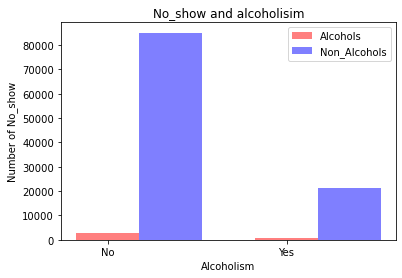

In [41]:
#to know relation of gender with no_show without proportions
width=0.35
location=[1,2]
Gender_count
plt.bar([1,2],Alcohols,width=width,color='r',label="Alcohols",alpha=0.5)
plt.bar([1+width,2+width],Non_Alcohols,width=width,color='b',label="Non_Alcohols",alpha=0.5)
plt.legend()
plt.xticks(location,["No","Yes"])
plt.xlabel("Alcoholism")
plt.ylabel("Number of No_show")
plt.title("No_show and alcoholisim")
plt.show()

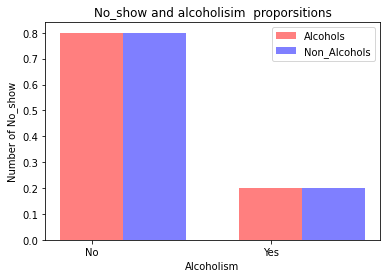

In [42]:
#to know relation of gender with no_show with proportions
width=0.35
location=[1,2]
Gender_count
plt.bar([1,2],Alcohols/len(df.query("alcoholism==1")),width=width,color='r',label="Alcohols",alpha=0.5)
plt.bar([1+width,2+width],Non_Alcohols/len(df.query("alcoholism==0")),width=width,color='b',label="Non_Alcohols",alpha=0.5)
plt.legend()
plt.xticks(location,["No","Yes"])
plt.xlabel("Alcoholism")
plt.ylabel("Number of No_show")
plt.title("No_show and alcoholisim  proporsitions")
plt.show()

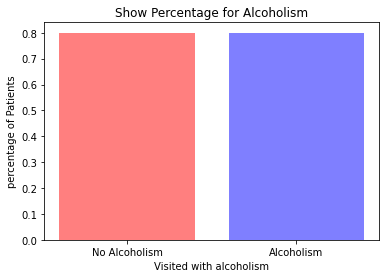

In [43]:
df_a_ratio = df[df.no_show == 'No'].groupby(['alcoholism']).size()/df.groupby(['alcoholism']).size()
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax = plt.bar(df_a_ratio.index,df_a_ratio,color=['r','b'],tick_label=x_ticks_labels,alpha=0.5)
plt.title("Show Percentage for Alcoholism")
plt.xlabel("Visited with alcoholism")
plt.ylabel("percentage of Patients")
plt.show()

The Above Plots shows that There are exactly 80% of alcoholism and non-alcoholism are visited.so this not help us in determining if a patient will come for a visit.

### Research Question 4  (Does SMSReceived patient are visit !)

In [44]:
df.sms_received.value_counts()

0    74409
1    35482
Name: sms_received, dtype: int64

In [45]:
#count of persion who are attend with sms_receives and not received 
Nos=df.query("no_show=='No'").sms_received.value_counts()
#count of persion who are not attend with sms_receives and not received 
Yes=df.query("no_show=='Yes'").sms_received.value_counts()

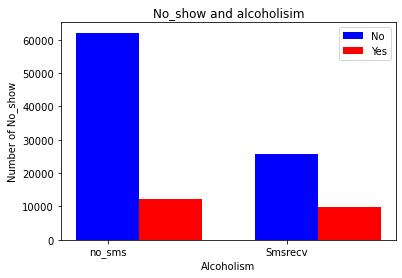

In [46]:
#to know relation of smsrecived with no_show without proportions
width=0.35
location=[1,2]
Gender_count
plt.bar([1,2],Nos,width=width,color='b',label="No")
plt.bar([1+width,2+width],Yes,width=width,color='r',label="Yes")
plt.legend()
plt.xticks(location,["no_sms","Smsrecv"])
plt.xlabel("Alcoholism")
plt.ylabel("Number of No_show")
plt.title("No_show and alcoholisim")
plt.show()

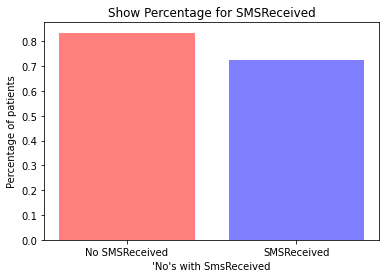

In [47]:
df_s_ratio = df[df.no_show == 'No'].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
x_ticks_labels=['No SMSReceived', 'SMSReceived']
plt.bar(df_s_ratio.index, df_s_ratio, color=['r','b'],alpha=0.5,tick_label=x_ticks_labels)
plt.title("Show Percentage for SMSReceived")
plt.xlabel("'No's with SmsReceived")
plt.ylabel("Percentage of patients")
plt.show()

Above plots tell that have not received SMS and out of them around 84% have come for the visit.who have received SMS around 72% of them have come for the visit.This looks opposite to what usually happens

### Research Question 4  (Let try on dibaties persons!)

In [48]:
df.diabetes.value_counts()

0    101998
1      7893
Name: diabetes, dtype: int64

In [49]:
Nos=df.query("no_show=='No'").diabetes.value_counts()
Yes=df.query("no_show=='Yes'").diabetes.value_counts()

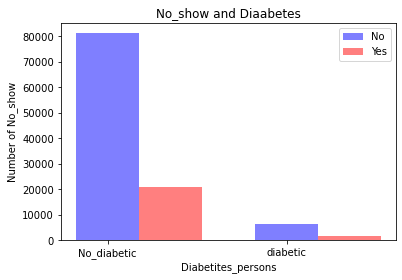

In [50]:
#to know relation of diabetes with no_show without proportions
width=0.35
location=[1,2]
Gender_count
plt.bar([1,2],Nos,width=width,color='b',label="No",alpha=0.5)
plt.bar([1+width,2+width],Yes,width=width,color='r',label="Yes",alpha=0.5)
plt.legend()
plt.xticks(location,["No_diabetic","diabetic"])
plt.xlabel("Diabetites_persons")
plt.ylabel("Number of No_show")
plt.title("No_show and Diaabetes")
plt.show()

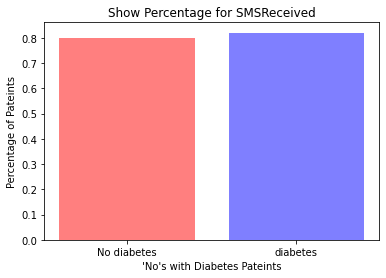

In [51]:
df_s_ratio = df[df.no_show == 'No'].groupby(['diabetes']).size()/df.groupby(['diabetes']).size()
x_ticks_labels=['No diabetes', 'diabetes']
plt.bar(df_s_ratio.index, df_s_ratio, color=['r','b'],alpha=0.5,tick_label=x_ticks_labels)
plt.title("Show Percentage for SMSReceived")
plt.xlabel("'No's with Diabetes Pateints")
plt.ylabel("Percentage of Pateints")
plt.show()

without Diabetes and out of them around 80% have come for the visit.Diabetes around 83% of them have come for the visit.This may useful

### Research Question 5  (Does the scheduled day affect the number of no-show appointments if it is a workday or a weekend?)

In [52]:
df['weeks']=df['scheduledday'].dt.day_name()
weekname=df['weeks'].value_counts().sort_index().index
df['weeks'].value_counts()

Tuesday      26044
Wednesday    24130
Monday       22951
Friday       18795
Thursday     17948
Saturday        23
Name: weeks, dtype: int64

In [53]:
Nos=df.query("no_show=='No'").weeks.value_counts().sort_index()
Yes=df.query("no_show=='Yes'").weeks.value_counts().sort_index()

In [54]:
df[df.no_show == 'No'].groupby(['weeks']).size()/df.groupby(['weeks']).size()

weeks
Friday       0.796063
Monday       0.803407
Saturday     0.956522
Thursday     0.796412
Tuesday      0.798111
Wednesday    0.799420
dtype: float64

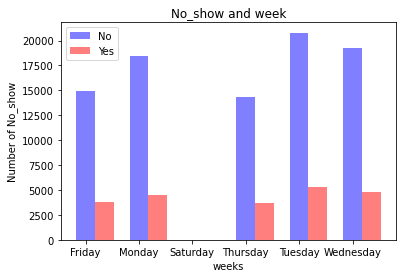

In [55]:
#to know relation of week with no_show without proportions
width=0.35
location=np.arange(len(weekname))
Gender_count
plt.bar(location,Nos,width=width,color='b',label="No",alpha=0.5)
plt.bar(location+width,Yes,width=width,color='r',label="Yes",alpha=0.5)
plt.legend()
plt.xticks(location,weekname)
plt.xlabel("weeks")
plt.ylabel("Number of No_show")
plt.title("No_show and week")
plt.show()

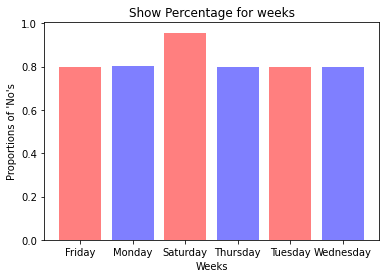

In [56]:
df_s_ratio = df[df.no_show == 'No'].groupby(['weeks']).size()/df.groupby(['weeks']).size()
x_ticks_labels=weekname
plt.bar(df_s_ratio.index, df_s_ratio, color=['r','b'],alpha=0.5,tick_label=x_ticks_labels)
plt.title("Show Percentage for weeks")
plt.xlabel("Weeks")
plt.ylabel("Proportions of 'No's")
plt.show()

we do not see a clear pattern in the patients visits based on the week day.

### Research Question 6 ( Are chronic illnesses like hypertension and diabetes affecting patient's absences?)

In [57]:
#count hipertension with no_show
df.groupby("no_show").hipertension.value_counts()

no_show  hipertension
No       0               69845
         1               17948
Yes      0               18370
         1                3728
Name: hipertension, dtype: int64

In [58]:
#count diabetes with no_show
df.groupby("no_show").diabetes.value_counts()

no_show  diabetes
No       0           81322
         1            6471
Yes      0           20676
         1            1422
Name: diabetes, dtype: int64

In [59]:
#pateint with diabetes and hipertension was attend
Diabet_hipertenson=df.query(" diabetes==1 and hipertension==1")
Nos=Diabet_hipertenson.query("no_show=='No'").count().iloc[0]/len(Diabet_hipertenson)
Yes=Diabet_hipertenson.query("no_show=='Yes'").count().iloc[0]/len(Diabet_hipertenson)

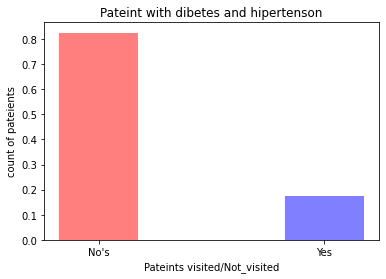

In [60]:
#to know relation of no_show  with who has diabets and hypertension with proportions
width=0.35
location=np.array([1,2])
plt.bar(location,[Nos,Yes],width=width,color=['r','b'],alpha=0.5)
plt.xticks(location,["No's","Yes"])
plt.xlabel("Pateints visited/Not_visited")
plt.ylabel("count of pateients")
plt.title("Pateint with dibetes and hipertenson")
plt.show()

Patients with diabets and hypertension are more visted

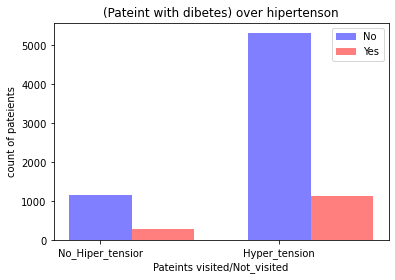

In [61]:
#patients with only diabets with hypertenson
diabet_petients=df.query("diabetes==1 ")
Nos=diabet_petients.query("no_show=='No'").hipertension.value_counts().sort_index()
Yes=diabet_petients.query("no_show=='Yes'").hipertension.value_counts().sort_index()
width=0.35
location=np.array([1,2])
plt.bar(location,Nos,width=width,color='b',alpha=0.5,label="No")
plt.bar(location+width,Yes,width=width,color='r',label="Yes",alpha=0.5)
plt.xticks(location,["No_Hiper_tensior","Hyper_tension"])
plt.legend()
plt.xlabel("Pateints visited/Not_visited")
plt.ylabel("count of pateients")
plt.title("(Pateint with dibetes) over hipertenson")
plt.show()

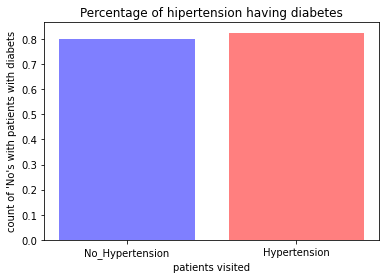

In [62]:
df_s_ratio = diabet_petients[diabet_petients.no_show == 'No'].groupby(['hipertension']).size()/diabet_petients.groupby(['hipertension']).size()
plt.bar([1,2],df_s_ratio,color=['b','r'],alpha=0.5,tick_label=["No_Hypertension","Hypertension"])
plt.xlabel("patients visited")
plt.ylabel("count of 'No's with patients with diabets")
plt.title("Percentage of hipertension having diabetes")
plt.show()

This  plot show that 79% of attend with having diabetes and no_Hypertension and 82% attend with diabets and hypertension

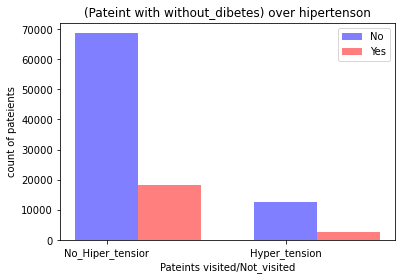

In [63]:
#patients with only diabets with hypertenson
No_diabet_petients=df.query("diabetes==0")
Nos=No_diabet_petients.query("no_show=='No'").hipertension.value_counts().sort_index()
Yes=No_diabet_petients.query("no_show=='Yes'").hipertension.value_counts().sort_index()
width=0.35
location=np.array([1,2])
plt.bar(location,Nos,width=width,color='b',alpha=0.5,label="No")
plt.bar(location+width,Yes,width=width,color='r',label="Yes",alpha=0.5)
plt.xticks(location,["No_Hiper_tensior","Hyper_tension"])
plt.legend()
plt.xlabel("Pateints visited/Not_visited")
plt.ylabel("count of pateients")
plt.title("(Pateint with without_dibetes) over hipertenson")
plt.show()

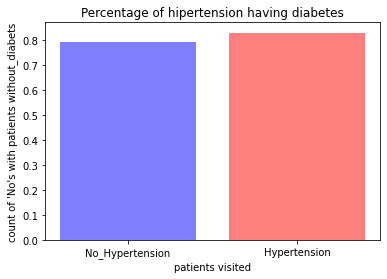

In [64]:
df_s_ratio = No_diabet_petients[No_diabet_petients.no_show == 'No'].groupby(['hipertension']).size()/No_diabet_petients.groupby(['hipertension']).size()
plt.bar([1,2],df_s_ratio,color=['b','r'],alpha=0.5,tick_label=["No_Hypertension","Hypertension"])
plt.xlabel("patients visited")
plt.ylabel("count of 'No's with patients without_diabets")
plt.title("Percentage of hipertension having diabetes")
plt.show()

This plot is also similar to plot with diabetes.so this also display major role for visiter's

### Research Question 7 (Who in terms of age misses more appointments? (Age Distribution))

We will draw a boxplot for the Age feature to check it's distribution.

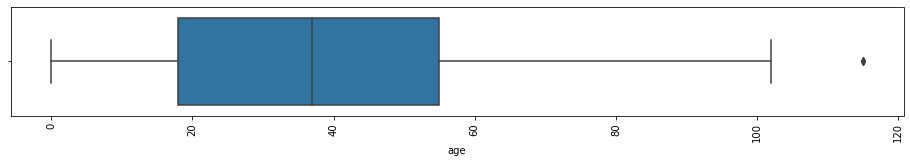

In [65]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
sns.boxplot(x=df.age)

From the above BoxPlot we can see that the Median Age is around 30 and the IQR is between 18 and 55. Though the BoxPlot shows few datapoints as outliers we will not consider them as true outliers for this case.

Below we will plot the number of patients for different Age.

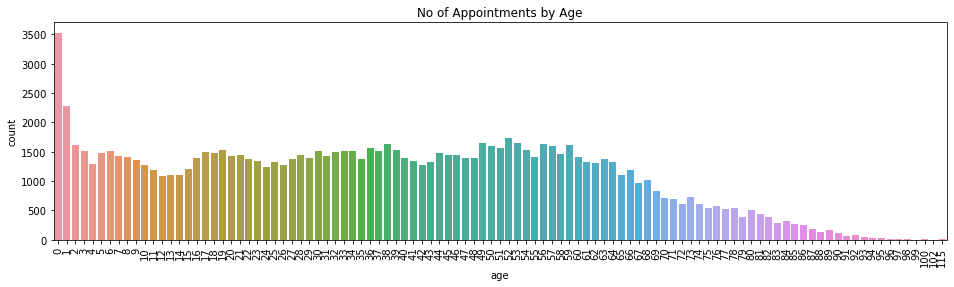

In [66]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("No of Appointments by Age")
plt.show()

From the above Histogram we can see that there are peaks for the Infants and then the distribution starts to be uniform. Later, after the Age of around 60 we see a right-skewed distribution.

Below we will plot the Show/NoShow for the patients based on their Age.

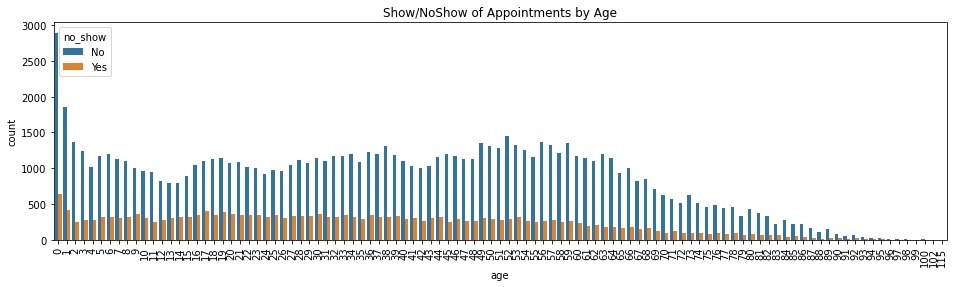

In [67]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age, hue=df.no_show)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

From the above visualization looks like the ratio of Show to NoShow is almost the same for all Age's except for 'Age 0' and 'Age 1'. We will get a better clarity on the ratio of Show to NoShow for all Age's.

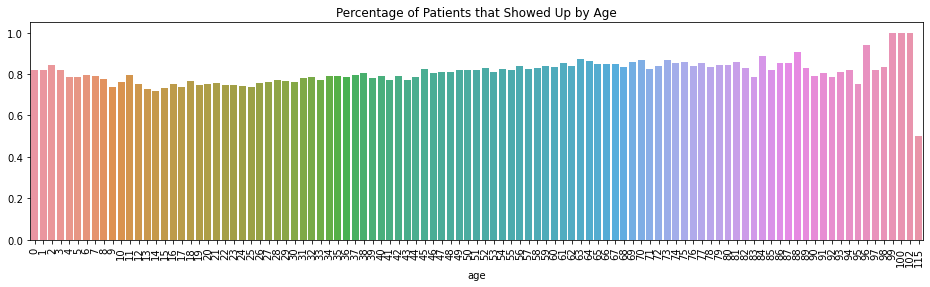

In [68]:
df_age_ratio = df[df.no_show == 'No'].groupby(['age']).size()/df.groupby(['age']).size()
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.show()

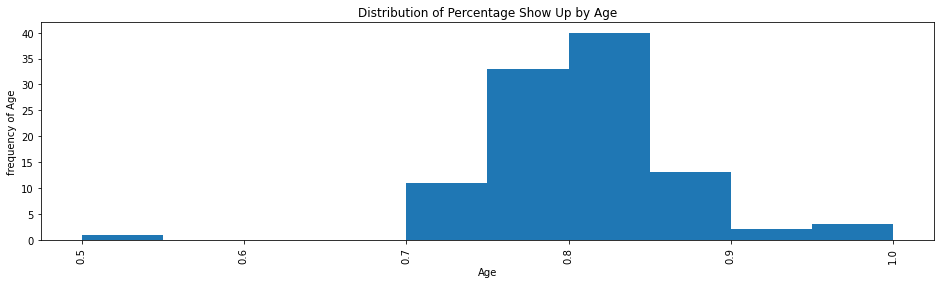

In [69]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age")
plt.xlabel("Age")
plt.ylabel("frequency of Age")
plt.show()

From the above visualization we could clearly see that most of the Age group patients have around 80% Show rate.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<pre><b>
    1.The above plot show Gender doesn't play a major role on whether they are visited
    2.who has less waiting time are attended without missing.
    3.alcoholism not help us in determining if a patient will come for a visit.
    4.we do not see a clear pattern in the patients visits based on the week day.
    5.In alocholism there reverse opinion.That who drink alcohol are visted more then others
    6.Some of columns give same distribution that are not play much rolw for classification
</b></pre>

## Limitations

<pre><b>
    1.AppointmentID span over a month only
    2.The appointment and the consultation doctor specialization would have helped us a lot in making better analysis and
      predictions for the NoShow of a patient.
    3.Some of waiting time is nagative
    4.Some pateints has negative age
    
</b></pre>